<h1> <b>Project: Investigate a Dataset (The Movie Database (TMDb)</b><h1>

<section>
<ul>
<li><h2><b> Table of Content</b></h2></li>
<li> <a href ="#Introduction">Introduction</a></li>
<li> <a href="#Data Wrangling">Data Wrangling</a></li>
    <li> <a href="#Exploratory Data Analyses"> Exploratory Data Analyses</a></li>
    <li><a href="#Conclusion"> Conclusion</a></li>
    <li><a href="#Resources"> Resources</a></li>
</ul></section>

<section id="Introduction">
<h3>Introduction</h3>
    <p>One of my clients, a movie producer in the TMDb movie by the name of Chris Pratt, has approached me, though with minimum budget, to recommend at least one movie Genres that is in high demand and can be efficiently produced within his budget’s constraint</p>
    <ul>
        <li><b>Key questions to solve</b></li>
        <li><b><h4> Question1: Which are the four topmost genres in the below listed categories:</h4></b></li>
        <ul>
            <li>Most_popular_level?</li>
            <li>high_quality_vote?</li>
            <li>highest_runtime?</li>
        </ul>
        <br>
        <li><b><h4> Question2: What is the individual relationship between each of the above three categories and the budget behavior corresponding to each category for each of the four genres?</h4></b></li><br>
        <li><b><h4> Question3: What is the COMBINED relationship of those categories under investigation with the general budget?</h4></b></li>
        <li><b><h4> Question4: What is the relationship between overall average sum of budget and overall average sum of revenue for each of these three categories:</h4></b></li>
        <ul>
            <li>Most_popular_level?</li>
            <li>high_quality_vote?</li>
            <li>highest_runtime?</li>
        </ul>
        <br>
        <li><b><h4> Question5: Which four genres meet the following specifications year after year:</h4></b></li>
        <ul>
            <li> Fall within Most_popular_level year after year</li>
            <li> Fall within high_quality_vote year after year</li>
            <li> Fall within highest_runtime year after year</li>
        </ul>
    </ul> 
</section>

<section id="Data Wrangling">
<h3>Data Wrangling</h3>
</section>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import numpy as np
import seaborn as sns
import datetime
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


for the purposes of time series analysis, I would change the release_year from its curret type as a numpy64int to a datetime object

In [4]:
#Y here is capitalized to indicate a 4-digit year
df['release_year'] = pd.to_datetime(df['release_year'], format='%Y')


In [7]:
#to have a look at the last five rows of the dataset 
df.tail() 

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966-01-01,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966-01-01,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966-01-01,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966-01-01,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966-01-01,127642.279154,0.0


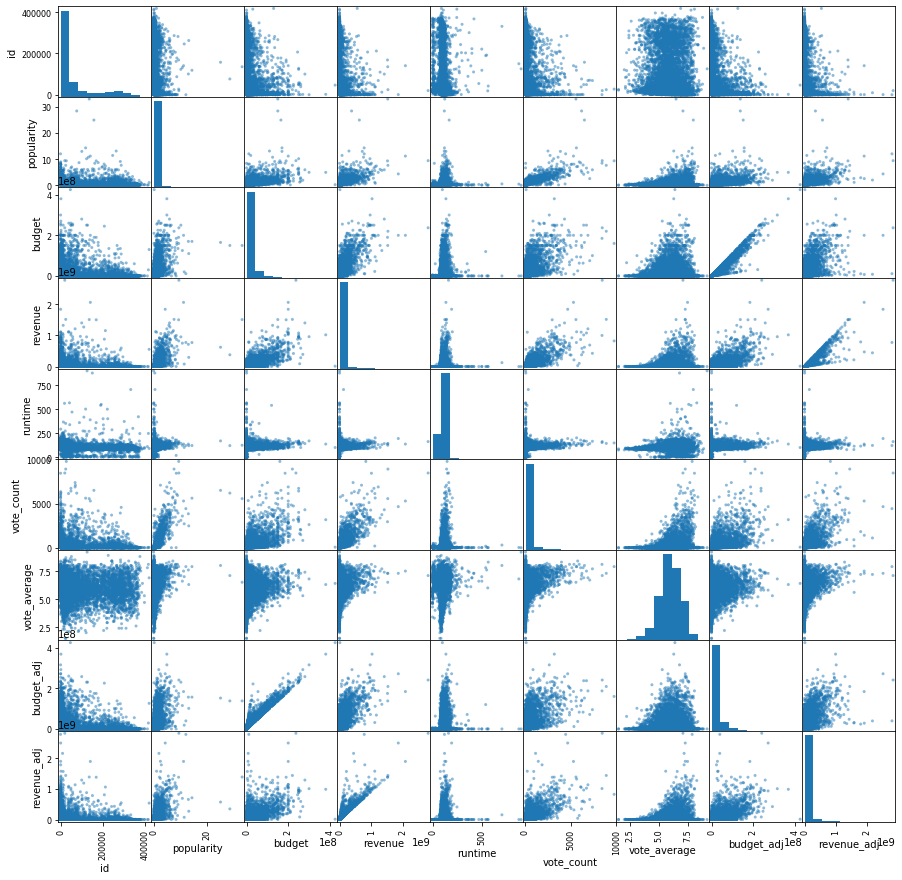

In [8]:
# for gaining a quick insight into the relationships amomg numerical variables with scatter plots
pd.plotting.scatter_matrix(df, figsize=(15,15));

In [9]:
# my intent here is to split the items in the genres column to unit genres for the purposes of analysis
structure_genres = df.set_index('id').genres.str.split(r'|', expand=True).stack().reset_index(level=1, drop=True).to_frame('genre');
structure_genres.head()

,genre
id,
135397,Action
135397,Adventure
135397,Science Fiction
135397,Thriller
76341,Action


In [10]:
# Here i need to add numeric meanings to various genres cetegories using a dummy variable.
# A dummy variable is an explanatory binary variable that equls 1
# if a certain categorical effect is present and that equals zero if that same effect is absent
structure_genres_Frame=pd.get_dummies(structure_genres, prefix='genres').groupby(level =0).sum()
structure_genres_Frame.head()

,genres_Action,genres_Adventure,genres_Animation,genres_Comedy,genres_Crime,genres_Documentary,genres_Drama,genres_Family,genres_Fantasy,genres_Foreign,genres_History,genres_Horror,genres_Music,genres_Mystery,genres_Romance,genres_Science Fiction,genres_TV Movie,genres_Thriller,genres_War,genres_Western
id,,,,,,,,,,,,,,,,,,,,
5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
12,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
13,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [11]:
# I'll be correctint the label names of genres_Science Fiction and genres_TV Movie
structure_genres_Frame=structure_genres_Frame.rename(columns = {'genres_Science Fiction':'genres_Science_Fiction', 'genres_TV Movie':'genres_TV_Movie'})
structure_genres_Frame.head()

,genres_Action,genres_Adventure,genres_Animation,genres_Comedy,genres_Crime,genres_Documentary,genres_Drama,genres_Family,genres_Fantasy,genres_Foreign,genres_History,genres_Horror,genres_Music,genres_Mystery,genres_Romance,genres_Science_Fiction,genres_TV_Movie,genres_Thriller,genres_War,genres_Western
id,,,,,,,,,,,,,,,,,,,,
5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
12,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
13,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [12]:
# I'll be resetting the index. it does the opposite of set_index.
# Here the hierarchical index level(s) are moved into the columns 
index_rest = structure_genres_Frame.reset_index()
index_rest

,id,genres_Action,genres_Adventure,genres_Animation,genres_Comedy,genres_Crime,genres_Documentary,genres_Drama,genres_Family,genres_Fantasy,...,genres_History,genres_Horror,genres_Music,genres_Mystery,genres_Romance,genres_Science_Fiction,genres_TV_Movie,genres_Thriller,genres_War,genres_Western
0,5,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,11,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,12,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,13,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10837,395560,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
10838,395883,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10839,409696,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
10840,414419,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Here we want add the newly created index_rest dataframe to the original one.
# concat glues the DataFrame objects together along an axis, row-wise by default
# However we are concatenating along axis =1, which is column-wise
df = pd.concat([df, index_rest], axis =1)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres_History,genres_Horror,genres_Music,genres_Mystery,genres_Romance,genres_Science_Fiction,genres_TV_Movie,genres_Thriller,genres_War,genres_Western
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


i shall be engineering some new few features to my transformed dataframe.
Notable:
    1.budget_level
    2.popularity_level
    3.vote_count_level
    4.runtime_level
    

In [14]:
# finding the minimun vale of the budget column
df['budget'].min()


0

In [15]:
# Finding the mean value of the budget column
df['budget'].mean()

14625701.09414688

In [16]:
# finding the maximun value of the budget column
df['budget'].max()


425000000

In [17]:
# I would like to find the 0, 25, 50, 75, 100 percentile of the budget column.
# What I did first is to list the budget data as a series and assign a variable df_calc to it
df_calc = df.budget
df_calc

0        150000000
1        150000000
2        110000000
3        200000000
4        190000000
           ...    
10861            0
10862            0
10863            0
10864            0
10865        19000
Name: budget, Length: 10866, dtype: int64

In [18]:
# Next I would like to find the minimun, 25h, 50th, 75th percentile as well as the maximun value of the budget column
result = np.percentile(df_calc, q=[0, 25, 50, 75, 100])
result

array([0.00e+00, 0.00e+00, 0.00e+00, 1.50e+07, 4.25e+08])

In [19]:
# Am creating a bin to contain the categorical features that satisfy a set of conditions
# Am also creating a new column-'budget_level' where the categories are housed
# The categories should be one less than the bin
bin_color = [0.0, 14625701.09414688, 1.50e+07, 425000000]
label_color = ['low_budget', 'moderate_budget','high_budget']
df['budget_level'] = pd.cut(df['budget'], bins =bin_color, labels =label_color)
df.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres_Horror,genres_Music,genres_Mystery,genres_Romance,genres_Science_Fiction,genres_TV_Movie,genres_Thriller,genres_War,genres_Western,budget_level
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,high_budget
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,high_budget
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,high_budget
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,high_budget
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,high_budget
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,high_budget
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,high_budget
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,high_budget
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,high_budget
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,high_budget


In [20]:
# statistics for the minimun value of the popularity column
df['popularity'].min()

6.500000000000001e-05

In [21]:
# statistics for the mean value of the popularity column
df['popularity'].mean()

0.6464409519602426

In [22]:
# statistics for the maximun value of the popularity column
df['popularity'].max()


32.985763

In [23]:
# Am creating a bin to contain the categorical features that satisfy a set of conditions
# Am also creating a new column-'popularity_level' where the categories are housed
# The categories should be one less than the bin
bingo = [6.500000000000001e-05, 0.6464409519602426, 32.985763]
label = ['popular', 'most_popular']
df['popularity_level'] = pd.cut(df['popularity'], bins =bingo, labels =label)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres_Music,genres_Mystery,genres_Romance,genres_Science_Fiction,genres_TV_Movie,genres_Thriller,genres_War,genres_Western,budget_level,popularity_level
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,high_budget,most_popular
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,high_budget,most_popular
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,high_budget,most_popular
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,high_budget,most_popular
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,high_budget,most_popular


In [24]:
# statistics for the minimun value of the vote_count column
df['vote_count'].min()


10

In [25]:
# statistics for the mean value of the vote_count column
df['vote_count'].mean()


217.38974783729063

In [26]:
# statistics for the max value of the vote_count column
df['vote_count'].max()

9767

In [27]:
# Am creating a bin to contain the categorical features that satisfy a set of conditions
# Am also creating a new column-'vote_count_level' where the categories are housed
# The categories should be one less than the bin
quality = [10, 217.38974783729063, 9767]
label_quality = ['low_quality_vote', 'high_quality_vote']
df['vote_count_level'] = pd.cut(df['vote_count'], bins =quality, labels =label_quality)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres_Mystery,genres_Romance,genres_Science_Fiction,genres_TV_Movie,genres_Thriller,genres_War,genres_Western,budget_level,popularity_level,vote_count_level
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,high_budget,most_popular,high_quality_vote
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,high_budget,most_popular,high_quality_vote
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,high_budget,most_popular,high_quality_vote
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,high_budget,most_popular,high_quality_vote
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,high_budget,most_popular,high_quality_vote


In [28]:
# statistics for the min value of the runtime column
df['runtime'].min()

0

In [29]:
# statistics for the mean value of the runtime column
df['runtime'].mean()

102.07086324314375

In [30]:
# statistics for the maximun value of the runtime column
df['runtime'].max()

900

In [31]:
# Am creating a bin to contain the categorical features that satisfy a set of conditions
# Am also creating a new column-'runtime_level' where the categories are housed
# The categories should be one less than the bin
runtime_length = [0, 102.07086324314375, 900.0]
label_runtime = ['moderate_runtime', 'highest_runtime']
df['runtime_level'] = pd.cut(df['runtime'], bins =runtime_length, labels =label_runtime)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres_Romance,genres_Science_Fiction,genres_TV_Movie,genres_Thriller,genres_War,genres_Western,budget_level,popularity_level,vote_count_level,runtime_level
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,0.0,0.0,0.0,0.0,0.0,0.0,high_budget,most_popular,high_quality_vote,highest_runtime
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,0.0,0.0,0.0,1.0,0.0,0.0,high_budget,most_popular,high_quality_vote,highest_runtime
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,0.0,1.0,0.0,0.0,0.0,0.0,high_budget,most_popular,high_quality_vote,highest_runtime
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,0.0,0.0,0.0,0.0,0.0,0.0,high_budget,most_popular,high_quality_vote,highest_runtime
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,1.0,0.0,0.0,0.0,0.0,0.0,high_budget,most_popular,high_quality_vote,highest_runtime


In [32]:
# This displays a consise summary of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      10866 non-null  int64         
 1   imdb_id                 10856 non-null  object        
 2   popularity              10866 non-null  float64       
 3   budget                  10866 non-null  int64         
 4   revenue                 10866 non-null  int64         
 5   original_title          10866 non-null  object        
 6   cast                    10790 non-null  object        
 7   homepage                2936 non-null   object        
 8   director                10822 non-null  object        
 9   tagline                 8042 non-null   object        
 10  keywords                9373 non-null   object        
 11  overview                10862 non-null  object        
 12  runtime                 10866 non-null  int64 

In [33]:
# By default, this marks duplicates as True excluding the first instance
# And it considers a row to be a duplicate only if all the values in all the columns match 
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10861    False
10862    False
10863    False
10864    False
10865    False
Length: 10866, dtype: bool

In [34]:
# For larger dataset
# it would be more helpful to get the count of the duplicates in the dataset like this
sum(df.duplicated())

0

In [35]:
# This returns the number of unque values in each column
df.nunique()

id                        10865
imdb_id                   10855
popularity                10814
budget                      557
revenue                    4702
original_title            10571
cast                      10719
homepage                   2896
director                   5067
tagline                    7997
keywords                   8804
overview                  10847
runtime                     247
genres                     2039
production_companies       7445
release_date               5909
vote_count                 1289
vote_average                 72
release_year                 56
budget_adj                 2614
revenue_adj                4840
id                        10842
genres_Action                 3
genres_Adventure              2
genres_Animation              2
genres_Comedy                 2
genres_Crime                  3
genres_Documentary            2
genres_Drama                  3
genres_Family                 2
genres_Fantasy                2
genres_F

In [36]:
# This returns the data types of the columns
df.dtypes

id                                 int64
imdb_id                           object
popularity                       float64
budget                             int64
revenue                            int64
original_title                    object
cast                              object
homepage                          object
director                          object
tagline                           object
keywords                          object
overview                          object
runtime                            int64
genres                            object
production_companies              object
release_date                      object
vote_count                         int64
vote_average                     float64
release_year              datetime64[ns]
budget_adj                       float64
revenue_adj                      float64
id                               float64
genres_Action                    float64
genres_Adventure                 float64
genres_Animation

In [37]:
# This returns useful descriptive statistics for each column of data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj,id,...,genres_History,genres_Horror,genres_Music,genres_Mystery,genres_Romance,genres_Science_Fiction,genres_TV_Movie,genres_Thriller,genres_War,genres_Western
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10842.000000,...,10842.000000,10842.000000,10842.000000,10842.000000,10842.000000,10842.000000,10842.000000,10842.000000,10842.000000,10842.000000
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,1.755104e+07,5.136436e+07,65870.675521,...,0.030806,0.150987,0.037631,0.074709,0.157904,0.113448,0.015403,0.268216,0.024903,0.015219
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,3.430616e+07,1.446325e+08,91981.355752,...,0.172800,0.358053,0.190312,0.262934,0.364668,0.317445,0.123155,0.443259,0.155837,0.122427
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,0.000000e+00,0.000000e+00,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,0.000000e+00,0.000000e+00,10589.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,0.000000e+00,0.000000e+00,20557.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2.085325e+07,3.369710e+07,75186.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,4.250000e+08,2.827124e+09,417859.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000


<p>A brief look at some relationships of the dataframe's feature</p>

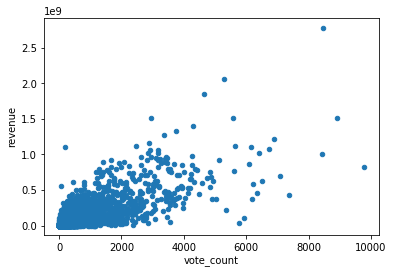

In [38]:
df.plot(x='vote_count', y= 'revenue', kind =('scatter'));

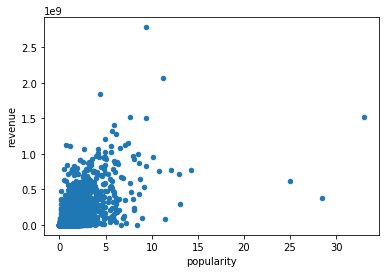

In [39]:
df.plot(x='popularity', y= 'revenue', kind =('scatter'));

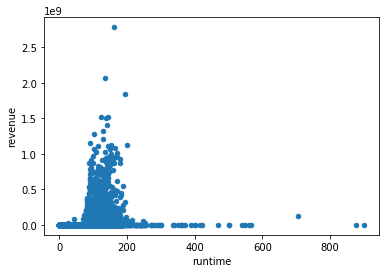

In [40]:
df.plot(x='runtime', y= 'revenue', kind =('scatter'));

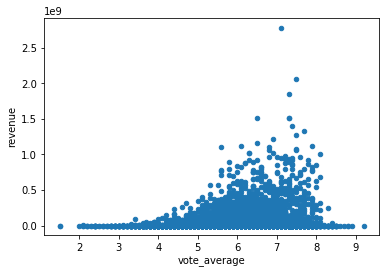

In [41]:
df.plot(x='vote_average', y='revenue', kind ='scatter');

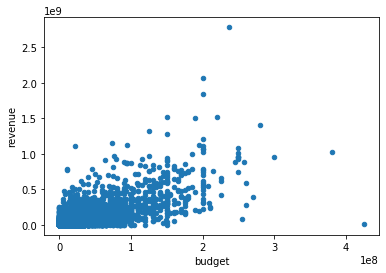

In [42]:
df.plot(x='budget', y='revenue', kind ='scatter');

In [43]:
# to display the column labels and their index
for i, v in enumerate(df.columns):
    print(i,v)

0 id
1 imdb_id
2 popularity
3 budget
4 revenue
5 original_title
6 cast
7 homepage
8 director
9 tagline
10 keywords
11 overview
12 runtime
13 genres
14 production_companies
15 release_date
16 vote_count
17 vote_average
18 release_year
19 budget_adj
20 revenue_adj
21 id
22 genres_Action
23 genres_Adventure
24 genres_Animation
25 genres_Comedy
26 genres_Crime
27 genres_Documentary
28 genres_Drama
29 genres_Family
30 genres_Fantasy
31 genres_Foreign
32 genres_History
33 genres_Horror
34 genres_Music
35 genres_Mystery
36 genres_Romance
37 genres_Science_Fiction
38 genres_TV_Movie
39 genres_Thriller
40 genres_War
41 genres_Western
42 budget_level
43 popularity_level
44 vote_count_level
45 runtime_level


<section id="Exploratory Data Analyses">
<h3>Exploratory Data Analyses</h3>
</section>

<h3>Stage 1A</h3>
<b>Question1: Which are the four topmost genres in the below listed categories</b>
<ul>
    <li>Most_popular_level</li>
    <li>high_quality_vote</li>
    <li>highest_runtime</li>
</ul>   

<h4>Solution approach:</h4>
<ul>
<p><li>In approaching this problem, I would first like to find in general, four leading genres in those three categories:</li></p></ul>


<h3>Stage1A</h3>
<h4> 1. Which four genres are topmost within the most_popular_level of the popularity column?</h4>
<ul>
    <li> a. First I would slice into the features I wish to investigate using iloc accessor and np.r_</li>
    <li> b. Then I would mask the most_popular_level genres together</li>
    <li> c. It may be appropriate to cross check that I have successfully masked out the most popular group from the less popular group</li>
    <li> d. Using exploratory data analysis, I would figure out four most popular genres from the most_popular_level of the popularity feature.</li>
</ul>

In [44]:
# I am using the iloc and np.r_ to slice the dataframe.
# This helps me isolate all genres, popularity column and popularity_level which is one of the newly engineered features
popularity_level_group = df.iloc[:, np.r_[2:3, 22:42, 43:44]]
popularity_level_group.head()

,popularity,genres_Action,genres_Adventure,genres_Animation,genres_Comedy,genres_Crime,genres_Documentary,genres_Drama,genres_Family,genres_Fantasy,...,genres_Horror,genres_Music,genres_Mystery,genres_Romance,genres_Science_Fiction,genres_TV_Movie,genres_Thriller,genres_War,genres_Western,popularity_level
0,32.985763,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,most_popular
1,28.419936,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,most_popular
2,13.112507,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,most_popular
3,11.173104,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,most_popular
4,9.335014,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,most_popular


In [45]:
# next I will mask out the most popular group
selecting_most_popular_group = popularity_level_group[popularity_level_group['popularity_level'] == 'most_popular']
selecting_most_popular_group.head()

,popularity,genres_Action,genres_Adventure,genres_Animation,genres_Comedy,genres_Crime,genres_Documentary,genres_Drama,genres_Family,genres_Fantasy,...,genres_Horror,genres_Music,genres_Mystery,genres_Romance,genres_Science_Fiction,genres_TV_Movie,genres_Thriller,genres_War,genres_Western,popularity_level
0,32.985763,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,most_popular
1,28.419936,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,most_popular
2,13.112507,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,most_popular
3,11.173104,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,most_popular
4,9.335014,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,most_popular


In [46]:
# Just to make sure that only the most popular group was selected with no trace of the popular group.
selecting_most_popular_group[selecting_most_popular_group['popularity_level']=='popular']

,popularity,genres_Action,genres_Adventure,genres_Animation,genres_Comedy,genres_Crime,genres_Documentary,genres_Drama,genres_Family,genres_Fantasy,...,genres_Horror,genres_Music,genres_Mystery,genres_Romance,genres_Science_Fiction,genres_TV_Movie,genres_Thriller,genres_War,genres_Western,popularity_level


In [47]:
# then I would groupby popularity and aggregate the average sum of popularity for the genres
# This is the average sum of the most popular genres
mean_most_popular_group = selecting_most_popular_group.groupby('popularity').mean().sum()
mean_most_popular_group

genres_Action              691.0
genres_Adventure           414.5
genres_Animation           199.0
genres_Comedy             1084.0
genres_Crime               397.0
genres_Documentary         119.0
genres_Drama              1324.0
genres_Family              355.0
genres_Fantasy             260.5
genres_Foreign              53.0
genres_History              89.0
genres_Horror              455.5
genres_Music               139.0
genres_Mystery             220.0
genres_Romance             485.0
genres_Science_Fiction     369.0
genres_TV_Movie             42.0
genres_Thriller            803.5
genres_War                  69.0
genres_Western              50.0
dtype: float64

In [48]:
width = .15
ind = np.arange(len(mean_most_popular_group))
ind

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

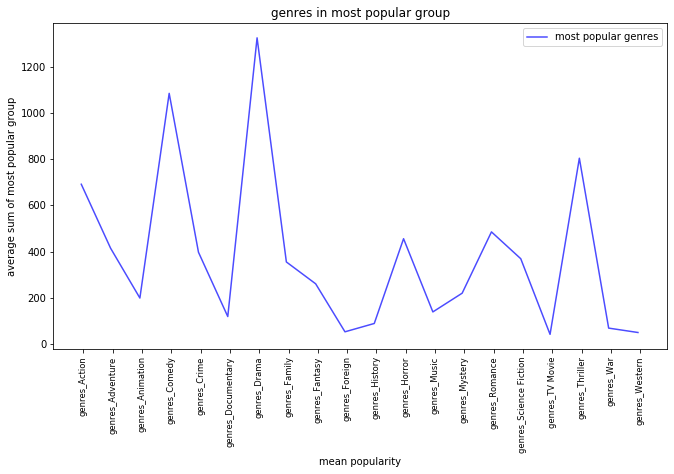

In [49]:
fig1, ax1 = plt.subplots(figsize =(11,6))
ax1.plot(mean_most_popular_group, label='most popular genres', color='b', alpha=.7)
ticks =ax1.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
labels = ax1.set_xticklabels(['genres_Action', 'genres_Adventure', 'genres_Animation', 'genres_Comedy',
'genres_Crime', 'genres_Documentary', 'genres_Drama', 'genres_Family', 
'genres_Fantasy', 'genres_Foreign', 'genres_History', 'genres_Horror', 
'genres_Music', 'genres_Mystery', 'genres_Romance', 'genres_Science Fiction', 
'genres_TV Movie', 'genres_Thriller', 'genres_War', 'genres_Western'], rotation =90, fontsize = 'small')
  # xtick labels
plt.ylabel('average sum of most popular group')
plt.xlabel('mean popularity')
plt.title('genres in most popular group')
locations = ind + width / 2 
 # xtick locations
plt.xticks(locations, labels)

# legend
plt.legend()


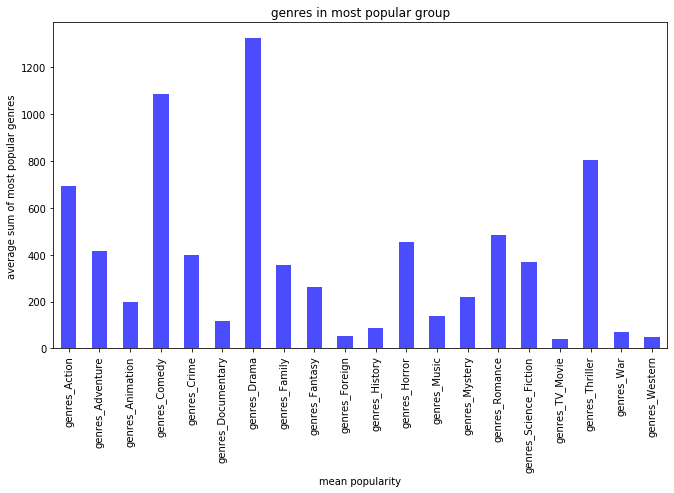

In [50]:
bar_plot = mean_most_popular_group.plot(kind ='bar', subplots=True, figsize=(11,6), color='b', alpha=.7)
for ax in bar_plot:
    ax.set_ylabel('average sum of most popular genres')
    ax.set_xlabel('mean popularity')
    ax.set_title('genres in most popular group')

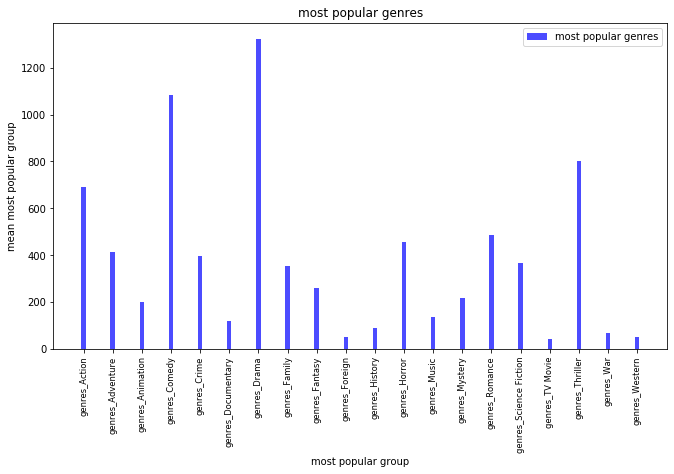

In [51]:
fig2, ax2 = plt.subplots(figsize =(11,6))
ax2.bar(ind +width, mean_most_popular_group, width, color='b', alpha=.7,label='most popular genres')
ticks =ax2.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
labels = ax2.set_xticklabels(['genres_Action', 'genres_Adventure', 'genres_Animation', 'genres_Comedy',
'genres_Crime', 'genres_Documentary', 'genres_Drama', 'genres_Family', 
'genres_Fantasy', 'genres_Foreign', 'genres_History', 'genres_Horror', 
'genres_Music', 'genres_Mystery', 'genres_Romance', 'genres_Science Fiction', 
'genres_TV Movie', 'genres_Thriller', 'genres_War', 'genres_Western'], rotation =90, fontsize = 'small')
  # xtick labels
plt.ylabel('mean most popular group')
plt.xlabel('most popular group')
plt.title('most popular genres')
locations = ind + width 
 # xtick locations
plt.xticks(locations, labels)

# legend
plt.legend()


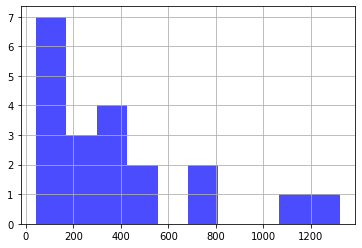

In [52]:
mean_most_popular_group.hist(color='b',alpha=.7)

<p>From the various plots above we can vividly see four of the genres that were topmost within the most_popular_level of the popularity column. They are listed below according to the degree (magnitude) of their popularity:</p>
<ol>
    <li>Genres_Drama</li>
    <li>Genres_Comedy</li>
    <li>Genres_Thriller</li>
    <li>Genres_Action</li>
</ol>

<h3>Stage1A</h3>
<h4> 2. Which four genres have the highest high_quality_vote in the vote_count column?</h4>
<ul>
    <li> a. First I would slice into the features I wish to investigate using iloc accessor and np.r_</li>
    <li> b. Then I would mask the high_qaulity_vote genres together</li>
    <li> c. It may be appropriate as in the previous case to cross check that I have successfully masked genres with highest high_qaulity_vote together.</li>
    <li>d. Using exploratory data analysis I would pin-point the four genres with the highest high_quality_vote</li>
</ul>

In [53]:
# Using numpy and iloc to select required data
vote_count_level_group = df.iloc[:, np.r_[16:17, 22:42, 44:45]]
vote_count_level_group

,vote_count,genres_Action,genres_Adventure,genres_Animation,genres_Comedy,genres_Crime,genres_Documentary,genres_Drama,genres_Family,genres_Fantasy,...,genres_Horror,genres_Music,genres_Mystery,genres_Romance,genres_Science_Fiction,genres_TV_Movie,genres_Thriller,genres_War,genres_Western,vote_count_level
0,5562,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,high_quality_vote
1,6185,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,high_quality_vote
2,2480,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,high_quality_vote
3,5292,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,high_quality_vote
4,2947,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,high_quality_vote
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low_quality_vote
10862,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low_quality_vote
10863,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low_quality_vote
10864,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low_quality_vote


In [54]:
# next I will select all genres the meet the reqirement of the high_quality_vote
selecting_high_quality_vote = vote_count_level_group[vote_count_level_group ['vote_count_level'] == 'high_quality_vote']
selecting_high_quality_vote.head()

,vote_count,genres_Action,genres_Adventure,genres_Animation,genres_Comedy,genres_Crime,genres_Documentary,genres_Drama,genres_Family,genres_Fantasy,...,genres_Horror,genres_Music,genres_Mystery,genres_Romance,genres_Science_Fiction,genres_TV_Movie,genres_Thriller,genres_War,genres_Western,vote_count_level
0,5562,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,high_quality_vote
1,6185,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,high_quality_vote
2,2480,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,high_quality_vote
3,5292,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,high_quality_vote
4,2947,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,high_quality_vote


In [55]:
# Just to make sure that only genres within the high_quality_vote category were selected with no trace of the low_quality_vote genres.
selecting_high_quality_vote[selecting_high_quality_vote['vote_count_level']=='low_quality_vote']

,vote_count,genres_Action,genres_Adventure,genres_Animation,genres_Comedy,genres_Crime,genres_Documentary,genres_Drama,genres_Family,genres_Fantasy,...,genres_Horror,genres_Music,genres_Mystery,genres_Romance,genres_Science_Fiction,genres_TV_Movie,genres_Thriller,genres_War,genres_Western,vote_count_level


In [56]:
# then I would groupby vote_count and aggregate the average sum of vote_count for the genres
# This is the average sum of the high_quality_vote genres
mean_high_quality_vote_genres = selecting_high_quality_vote.groupby('vote_count').mean().sum()
mean_high_quality_vote_genres

genres_Action             264.305880
genres_Adventure          153.144986
genres_Animation           68.808514
genres_Comedy             401.845815
genres_Crime              138.102958
genres_Documentary         36.638564
genres_Drama              467.690873
genres_Family             118.119661
genres_Fantasy             89.531061
genres_Foreign             24.752020
genres_History             29.338925
genres_Horror             151.045815
genres_Music               43.055231
genres_Mystery             69.885786
genres_Romance            178.500577
genres_Science_Fiction    140.175505
genres_TV_Movie            13.377778
genres_Thriller           284.266053
genres_War                 29.494444
genres_Western             14.525000
dtype: float64

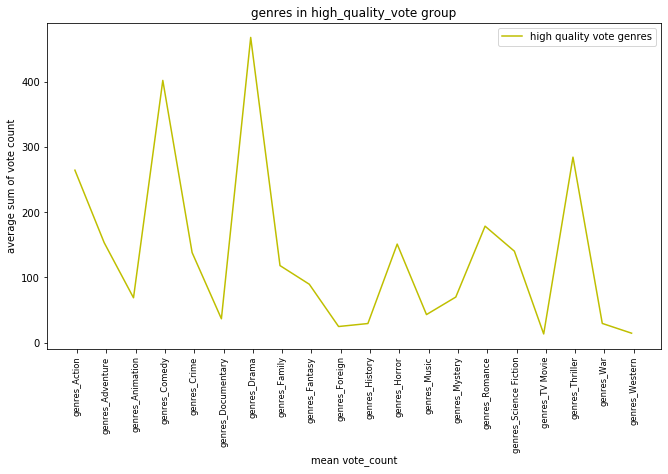

In [57]:
fig3, ax3 = plt.subplots(figsize =(11,6))
ax3.plot(mean_high_quality_vote_genres, label='high quality vote genres', color='y')
ticks =ax3.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
labels = ax3.set_xticklabels(['genres_Action', 'genres_Adventure', 'genres_Animation', 'genres_Comedy',
'genres_Crime', 'genres_Documentary', 'genres_Drama', 'genres_Family', 
'genres_Fantasy', 'genres_Foreign', 'genres_History', 'genres_Horror', 
'genres_Music', 'genres_Mystery', 'genres_Romance', 'genres_Science Fiction', 
'genres_TV Movie', 'genres_Thriller', 'genres_War', 'genres_Western'], rotation =90, fontsize = 'small')
  # xtick labels
plt.ylabel('average sum of vote count')
plt.xlabel('mean vote_count')
plt.title('genres in high_quality_vote group')
locations = ind + width / 2 
 # xtick locations
plt.xticks(locations, labels)

# legend
plt.legend()


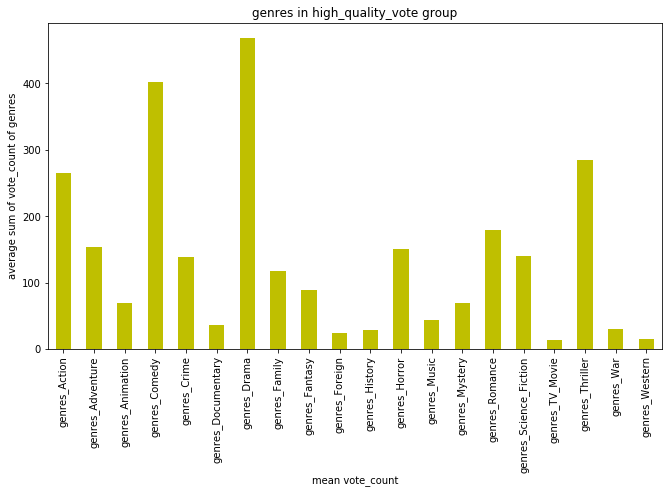

In [58]:
bar_plot = mean_high_quality_vote_genres.plot(kind ='bar', subplots=True, figsize=(11,6), color='y')
for ax in bar_plot:
    ax.set_ylabel('average sum of vote_count of genres')
    ax.set_xlabel('mean vote_count')
    ax.set_title('genres in high_quality_vote group')

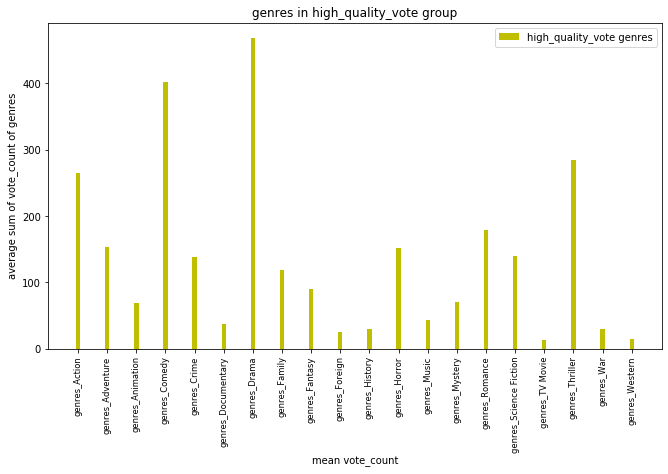

In [59]:
fig4, ax4 = plt.subplots(figsize =(11,6))
ax4.bar(ind +width, mean_high_quality_vote_genres, width, color='y', alpha=1,label='high_quality_vote genres')
ticks =ax4.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
labels = ax4.set_xticklabels(['genres_Action', 'genres_Adventure', 'genres_Animation', 'genres_Comedy',
'genres_Crime', 'genres_Documentary', 'genres_Drama', 'genres_Family', 
'genres_Fantasy', 'genres_Foreign', 'genres_History', 'genres_Horror', 
'genres_Music', 'genres_Mystery', 'genres_Romance', 'genres_Science Fiction', 
'genres_TV Movie', 'genres_Thriller', 'genres_War', 'genres_Western'], rotation =90, fontsize = 'small')
  # xtick labels
plt.ylabel('average sum of vote_count of genres')
plt.xlabel('mean vote_count')
plt.title('genres in high_quality_vote group')
locations = ind + width 
 # xtick locations
plt.xticks(locations, labels)

# legend
plt.legend()


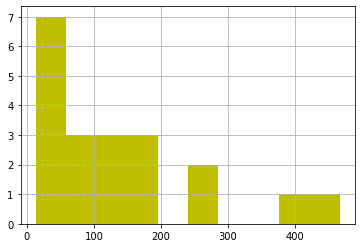

In [60]:
mean_high_quality_vote_genres.hist(color='y')

<p>From the results above the previous conclusion is further strengthened revealing four main top players in vote count:</p>
<ul>
    <li> 1. Genres_Action</li>
    <li> 2. Genres_Comedy</li>
    <li> 3. Genres_Drama</li>
    <li>4. Genres_Thriller</li>
</ul>

<h3>Stage1A</h3>
<h4>3. Which four genres are highest within the highest_runtime category of runtime column?</h4>
<ul>
    <li> a. First I would select the features I wish to investigate using iloc accessor and np.r_</li>
    <li> b. Then I would mask the highest runtime genres together</li>
    <li> c. I would cross check that I have successfully masked out the highest runtime group from the low runtime group</li>
    <li> d. Using exploratory data analysis I would determine the four genres with the highest runtime</li>

In [61]:
# selecting the runtime_level column using numpy and iloc
runtime_level_group = df.iloc[:, np.r_[12:13, 22:42, 45:46]]
runtime_level_group.head()

,runtime,genres_Action,genres_Adventure,genres_Animation,genres_Comedy,genres_Crime,genres_Documentary,genres_Drama,genres_Family,genres_Fantasy,...,genres_Horror,genres_Music,genres_Mystery,genres_Romance,genres_Science_Fiction,genres_TV_Movie,genres_Thriller,genres_War,genres_Western,runtime_level
0,124,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,highest_runtime
1,120,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,highest_runtime
2,119,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,highest_runtime
3,136,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,highest_runtime
4,137,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,highest_runtime


In [62]:
# next I will mask out the highest_runtime category of the runtime column
selecting_highest_runtime = runtime_level_group[runtime_level_group ['runtime_level'] == 'highest_runtime']
selecting_highest_runtime.head()

,runtime,genres_Action,genres_Adventure,genres_Animation,genres_Comedy,genres_Crime,genres_Documentary,genres_Drama,genres_Family,genres_Fantasy,...,genres_Horror,genres_Music,genres_Mystery,genres_Romance,genres_Science_Fiction,genres_TV_Movie,genres_Thriller,genres_War,genres_Western,runtime_level
0,124,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,highest_runtime
1,120,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,highest_runtime
2,119,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,highest_runtime
3,136,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,highest_runtime
4,137,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,highest_runtime


In [63]:
# Just to make sure that only genres in the highest_runtime category were selected with no trace of the moderate_runtime group.
selecting_highest_runtime[selecting_highest_runtime['runtime_level']=='moderate_runtime']

,runtime,genres_Action,genres_Adventure,genres_Animation,genres_Comedy,genres_Crime,genres_Documentary,genres_Drama,genres_Family,genres_Fantasy,...,genres_Horror,genres_Music,genres_Mystery,genres_Romance,genres_Science_Fiction,genres_TV_Movie,genres_Thriller,genres_War,genres_Western,runtime_level


In [64]:
# then I would groupby runtime and aggregate the average sum of runtime for the genres
# This is the average sum of the high_quality_vote genres
mean_highest_runtime_genres = selecting_highest_runtime.groupby('runtime').mean().sum()
mean_highest_runtime_genres 

genres_Action             25.454502
genres_Adventure          16.829896
genres_Animation          11.147655
genres_Comedy             51.675614
genres_Crime              16.779703
genres_Documentary         6.940749
genres_Drama              68.075447
genres_Family             13.385771
genres_Fantasy            12.854954
genres_Foreign             2.866989
genres_History             7.072239
genres_Horror             24.409520
genres_Music               6.477929
genres_Mystery            11.870848
genres_Romance            26.436283
genres_Science_Fiction    15.076383
genres_TV_Movie            3.045902
genres_Thriller           36.519687
genres_War                 3.219633
genres_Western             1.749636
dtype: float64

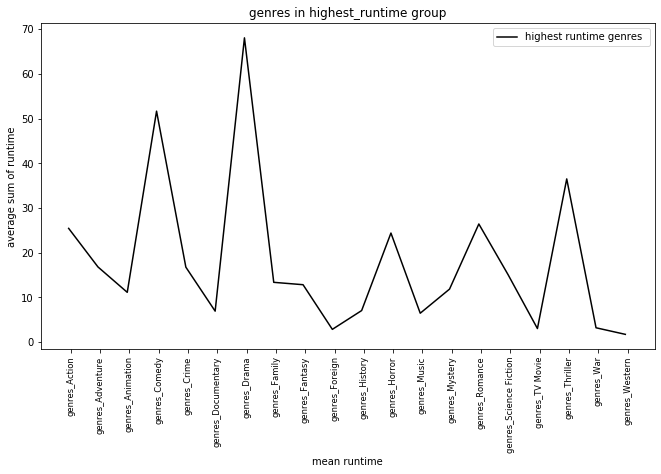

In [67]:
fig5, ax5 = plt.subplots(figsize =(11,6))
ax5.plot(mean_highest_runtime_genres, label='highest runtime genres ', color='k')
ticks =ax5.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
labels = ax5.set_xticklabels(['genres_Action', 'genres_Adventure', 'genres_Animation', 'genres_Comedy',
'genres_Crime', 'genres_Documentary', 'genres_Drama', 'genres_Family', 
'genres_Fantasy', 'genres_Foreign', 'genres_History', 'genres_Horror', 
'genres_Music', 'genres_Mystery', 'genres_Romance', 'genres_Science Fiction', 
'genres_TV Movie', 'genres_Thriller', 'genres_War', 'genres_Western'], rotation =90, fontsize = 'small')
  # xtick labels
plt.ylabel('average sum of runtime')
plt.xlabel('mean runtime')
plt.title('genres in highest_runtime group')
locations = ind + width / 2 
 # xtick locations
plt.xticks(locations, labels)

# legend
plt.legend()


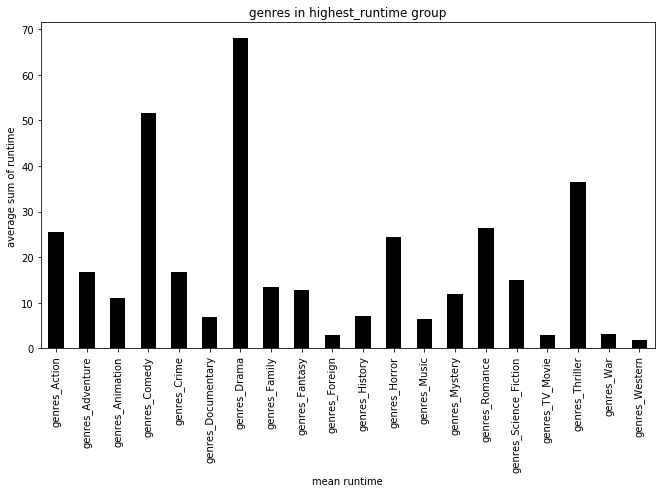

In [68]:
bar_plot = mean_highest_runtime_genres.plot(kind ='bar', subplots=True, figsize=(11,6), color='k')
for ax in bar_plot:
    ax.set_ylabel('average sum of runtime')
    ax.set_xlabel('mean runtime')
    ax.set_title('genres in highest_runtime group')

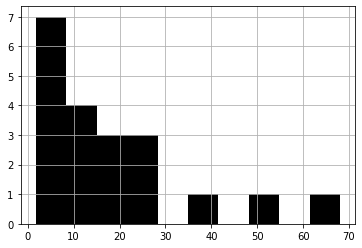

In [69]:
mean_highest_runtime_genres.hist(color='k')

<b>Question2: What is the individual relationship between each of the above three categories and the budget behavior corresponding to each category for each of the four genres</b><br>


<h3>Stage1B</h3>
<p>I have found three ideal categories for my client's genres, namely:</p>
<ul>
    <li>Most_popular_level</li>
    <li>high_quality_vote</li>
    <li>highest_runtime</li>
</ul>

<p>However, I think it will only make sense to find what it takes budgetary-wise to maintain each of those positions since one of my clients major conditions is a low budget requirement.</p>

<p>Therefore, I would like to find the individual relationship between each of the above three categories and the budget behavior corresponding to each category for each of the four genres.</p>

<p>That is, I would like to find for each of the four genres, the relationship between each of these categories (Most_popular_level, high_quality_vote and highest_runtime) and the budget level(s) corresponding to that category. In order words I am looking for the budget requirement for each of the four genres in each of the categories above for each budget_level.</p>

<h3>Stage1B</h3>

<h4>Relationship No1</h4>

<p>In this first part, I am analyzing the relationship between the budgetary behavior of genres in the Most_popular_level category within the different levels of budget observed. The levels of budget here are 'low_budget', 'moderate_budget','high_budget.</p>


In [70]:
#I'll begin by selecting the popularity_level column
budget_selection_of_popularity_level = df.iloc[:, np.r_[2:4, 22:42, 42:44]]
budget_selection_of_popularity_level.head()

,popularity,budget,genres_Action,genres_Adventure,genres_Animation,genres_Comedy,genres_Crime,genres_Documentary,genres_Drama,genres_Family,...,genres_Music,genres_Mystery,genres_Romance,genres_Science_Fiction,genres_TV_Movie,genres_Thriller,genres_War,genres_Western,budget_level,popularity_level
0,32.985763,150000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,high_budget,most_popular
1,28.419936,150000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,high_budget,most_popular
2,13.112507,110000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,high_budget,most_popular
3,11.173104,200000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,high_budget,most_popular
4,9.335014,190000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,high_budget,most_popular


In [71]:
# Next I'll select the most_popular category of the popularity column
selecting_budget_most_popular_group = budget_selection_of_popularity_level[budget_selection_of_popularity_level['popularity_level'] == 'most_popular']
selecting_budget_most_popular_group.head()

,popularity,budget,genres_Action,genres_Adventure,genres_Animation,genres_Comedy,genres_Crime,genres_Documentary,genres_Drama,genres_Family,...,genres_Music,genres_Mystery,genres_Romance,genres_Science_Fiction,genres_TV_Movie,genres_Thriller,genres_War,genres_Western,budget_level,popularity_level
0,32.985763,150000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,high_budget,most_popular
1,28.419936,150000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,high_budget,most_popular
2,13.112507,110000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,high_budget,most_popular
3,11.173104,200000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,high_budget,most_popular
4,9.335014,190000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,high_budget,most_popular


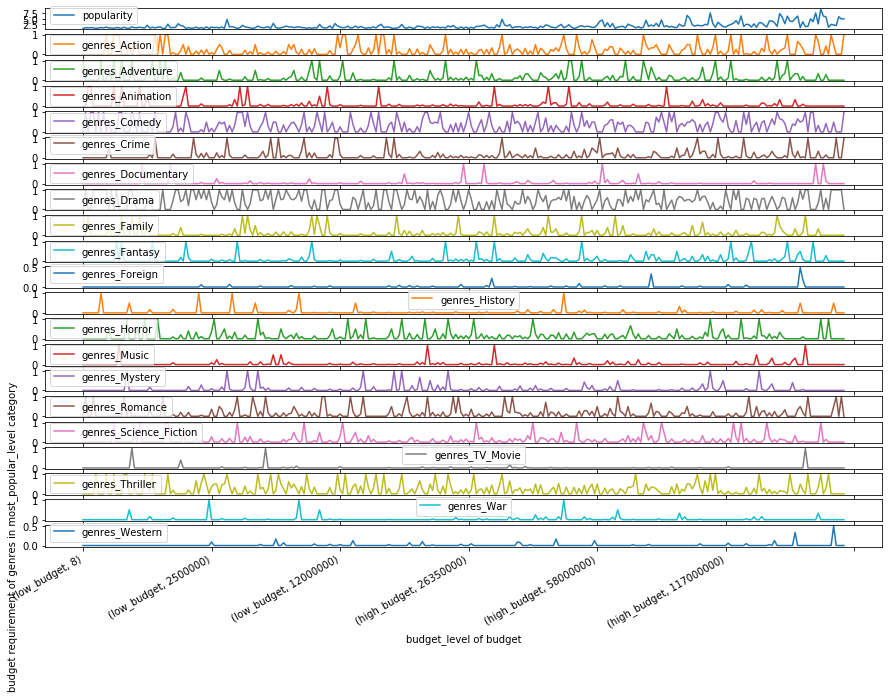

In [72]:
# Most popular Genres' behavior at different levels of budget
this = selecting_budget_most_popular_group.groupby([selecting_budget_most_popular_group['budget_level'], selecting_budget_most_popular_group['budget']]).mean().dropna()
this.plot(figsize=(15,11), subplots=True)
plt.xlabel('budget_level of budget')
plt.ylabel('budget requirement of genres in most_popular_level category')
plt.ylabel_locations = 'center';

<p>In the figure above, the budget requirement of Genres_Comedy and Genres_Drama show a relatively steady relationship within the various levels of budget observed.
The budget requirement for the other two genres (genres_Action and genres_Thriller) showed variations in at least one of the levels of budget observed.</p>


<h3>Stage1B</h3>

<h4>Relationship No2</h4>

<p>In this second part, I am examining the relationship between the high_quality_vote category's budgetary requirements of its genres at the different levels of budget observed</p>

<p>In this second part, I am analyzing the relationship between the budgetary behavior of genres in the high_quality_vote category within the different levels of budget observed. The levels of budget here are 'low_budget', 'moderate_budget','high_budget.</p>


In [73]:
# I'll be selecting the vote_count_level column
budget_selection_of_vote_count_level = df.iloc[:, np.r_[3:4, 16:17, 22:43, 44:45]]
budget_selection_of_vote_count_level.head()

,budget,vote_count,genres_Action,genres_Adventure,genres_Animation,genres_Comedy,genres_Crime,genres_Documentary,genres_Drama,genres_Family,...,genres_Music,genres_Mystery,genres_Romance,genres_Science_Fiction,genres_TV_Movie,genres_Thriller,genres_War,genres_Western,budget_level,vote_count_level
0,150000000,5562,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,high_budget,high_quality_vote
1,150000000,6185,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,high_budget,high_quality_vote
2,110000000,2480,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,high_budget,high_quality_vote
3,200000000,5292,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,high_budget,high_quality_vote
4,190000000,2947,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,high_budget,high_quality_vote


In [74]:
#I'll be selecting the high_quality_vote category of the vote_count column
selecting_budget_high_quality_vote_group = budget_selection_of_vote_count_level[budget_selection_of_vote_count_level['vote_count_level'] == 'high_quality_vote']
selecting_budget_high_quality_vote_group.head()

,budget,vote_count,genres_Action,genres_Adventure,genres_Animation,genres_Comedy,genres_Crime,genres_Documentary,genres_Drama,genres_Family,...,genres_Music,genres_Mystery,genres_Romance,genres_Science_Fiction,genres_TV_Movie,genres_Thriller,genres_War,genres_Western,budget_level,vote_count_level
0,150000000,5562,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,high_budget,high_quality_vote
1,150000000,6185,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,high_budget,high_quality_vote
2,110000000,2480,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,high_budget,high_quality_vote
3,200000000,5292,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,high_budget,high_quality_vote
4,190000000,2947,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,high_budget,high_quality_vote


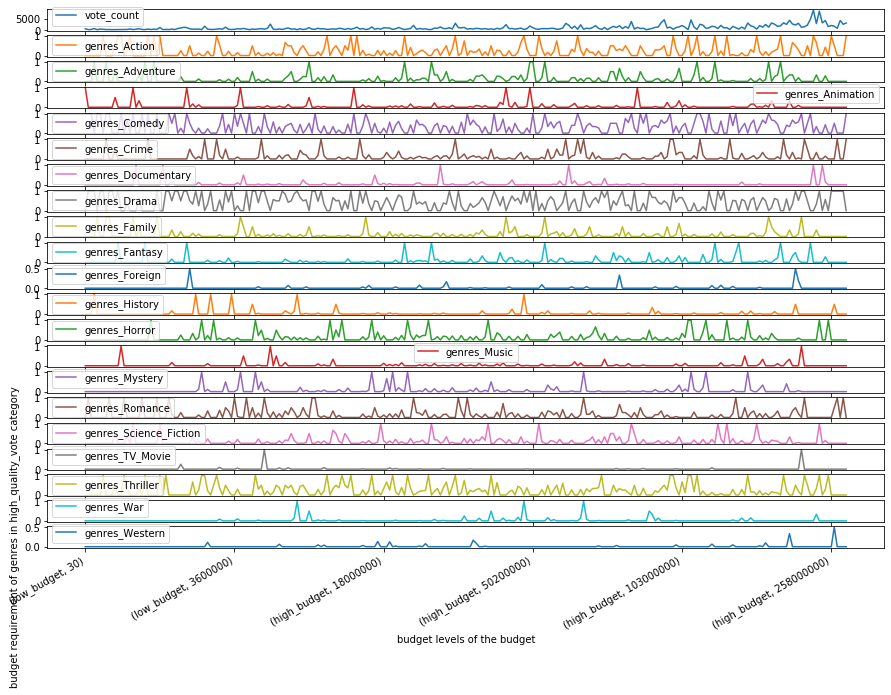

In [75]:
# high_quality_vote_Genres' behavior at different levels of budget
this1 = selecting_budget_high_quality_vote_group.groupby([selecting_budget_high_quality_vote_group['budget_level'], selecting_budget_high_quality_vote_group['budget']]).mean().dropna()
this1.plot(figsize=(15,11), subplots=True)
plt.xlabel('budget levels of the budget')
plt.ylabel('budget requirement of genres in high_quality_vote category')
plt.ylabel_locations = 'center';

<p>Genres_Drama and Genres_Comedy are in a healthy competition with respect to vote_count budgetary requirement for the different budget levels observed. While Genres_Actin and Genres_Thriller also show evidence of competition with respect to vote_count budgetary requirement.</p>

<h3>Stage1B</h3>

<h4>Relationship No3</h4>
<p>In this third part, I am examining the relationship between the highest_runtime category's budgetary requirements of its genres at the different levels of budget observed</>


In [76]:
# selecting the runtime_level column
budget_selection_of_runtime_level = df.iloc[:, np.r_[3:4, 12:13, 22:43, 45:46]]
budget_selection_of_runtime_level.head()

,budget,runtime,genres_Action,genres_Adventure,genres_Animation,genres_Comedy,genres_Crime,genres_Documentary,genres_Drama,genres_Family,...,genres_Music,genres_Mystery,genres_Romance,genres_Science_Fiction,genres_TV_Movie,genres_Thriller,genres_War,genres_Western,budget_level,runtime_level
0,150000000,124,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,high_budget,highest_runtime
1,150000000,120,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,high_budget,highest_runtime
2,110000000,119,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,high_budget,highest_runtime
3,200000000,136,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,high_budget,highest_runtime
4,190000000,137,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,high_budget,highest_runtime


In [77]:
# selecting the highest_runtime category of the runtime column
selecting_budget_highest_runtime = budget_selection_of_runtime_level[budget_selection_of_runtime_level['runtime_level'] == 'highest_runtime']
selecting_budget_highest_runtime.head()

,budget,runtime,genres_Action,genres_Adventure,genres_Animation,genres_Comedy,genres_Crime,genres_Documentary,genres_Drama,genres_Family,...,genres_Music,genres_Mystery,genres_Romance,genres_Science_Fiction,genres_TV_Movie,genres_Thriller,genres_War,genres_Western,budget_level,runtime_level
0,150000000,124,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,high_budget,highest_runtime
1,150000000,120,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,high_budget,highest_runtime
2,110000000,119,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,high_budget,highest_runtime
3,200000000,136,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,high_budget,highest_runtime
4,190000000,137,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,high_budget,highest_runtime


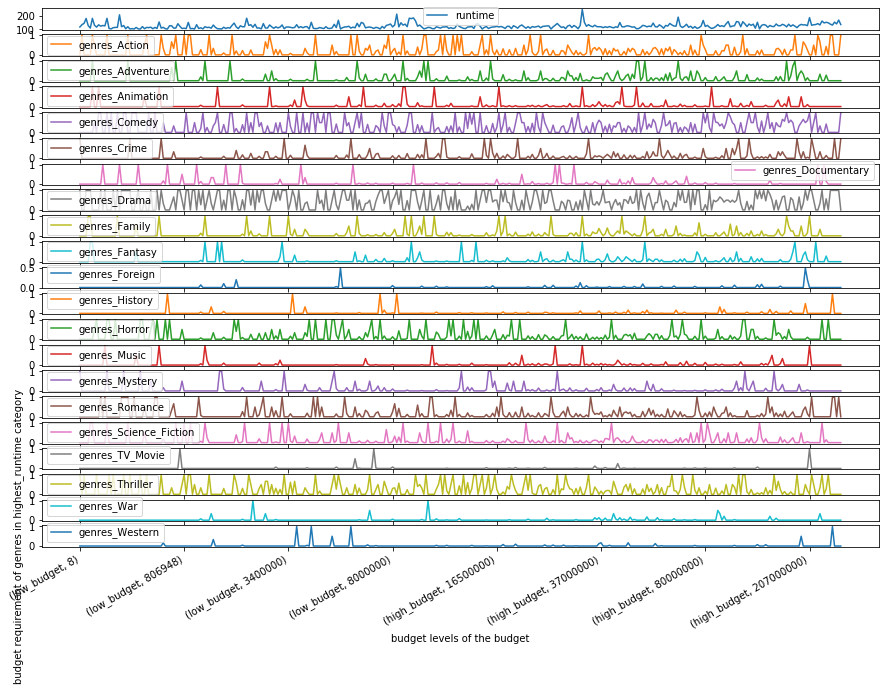

In [78]:
# highest_runtime Genres' behavior at different levels of budget
this2 = selecting_budget_highest_runtime.groupby([selecting_budget_highest_runtime['budget_level'], selecting_budget_highest_runtime['budget']]).mean().dropna()
this2.plot(figsize=(15,11), subplots=True)
plt.xlabel('budget levels of the budget')
plt.ylabel('budget requirement of genres in highest_runtime category')
plt.ylabel_locations = 'center';

<p>The relationship between the highest_runtime Genres budgetary requirement for the different budget levels observed show consistency with the earlier two results.</p>

<b>Question3: What is the COMBINED relationship of those categories under investigation with the general budget?</b><br>

<h3>Stage1C</h3>

<p>In the preceding, we saw for each genre its individual budgetary requirement at different levels of budget for each of the categories under investigation, namely: Most_popular_level, high_quality_vote and highest_runtime.</p>

<p>In this section we want to take a look at the COMBINED relationship of those categories under investigation with the general budget.</p>

<ul>
    <p>I'll do this in two parts under this stage1C:</p>
    <li>First part is plot the mean of the overall budget</li>
    <li>Second Part is to plot the mean of the overall budget and the three categories under investigation</li>


In [79]:
# I'll be selecting budget and the features to be used for my analysis
budget_behavior_of_all_levels = df.iloc[:, np.r_[3:4, 22:43]]
budget_behavior_of_all_levels.head()

,budget,genres_Action,genres_Adventure,genres_Animation,genres_Comedy,genres_Crime,genres_Documentary,genres_Drama,genres_Family,genres_Fantasy,...,genres_Horror,genres_Music,genres_Mystery,genres_Romance,genres_Science_Fiction,genres_TV_Movie,genres_Thriller,genres_War,genres_Western,budget_level
0,150000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,high_budget
1,150000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,high_budget
2,110000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,high_budget
3,200000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,high_budget
4,190000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,high_budget


In [80]:
# then I would groupby budget and budget_level and aggregate the average sum of budget for the genres
# This is the average sum of the budget for all levels
mean_overall_budget = budget_behavior_of_all_levels.groupby(['budget', 'budget_level']).mean().sum().dropna()
mean_overall_budget.head()

genres_Action       120.243967
genres_Adventure     71.056804
genres_Animation     37.493496
genres_Comedy       175.478738
genres_Crime         61.675471
dtype: float64

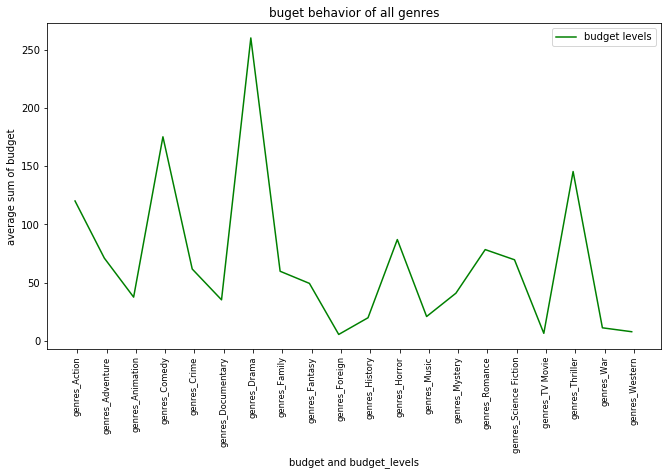

In [81]:
fig6, ax6 = plt.subplots(figsize =(11,6))
ax6.plot(mean_overall_budget, label='budget levels', color='g')
ticks =ax6.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
labels = ax6.set_xticklabels(['genres_Action', 'genres_Adventure', 'genres_Animation', 'genres_Comedy',
'genres_Crime', 'genres_Documentary', 'genres_Drama', 'genres_Family', 
'genres_Fantasy', 'genres_Foreign', 'genres_History', 'genres_Horror', 
'genres_Music', 'genres_Mystery', 'genres_Romance', 'genres_Science Fiction', 
'genres_TV Movie', 'genres_Thriller', 'genres_War', 'genres_Western'], rotation =90, fontsize = 'small')
  # xtick labels
plt.ylabel('average sum of budget')
plt.xlabel('budget and budget_levels')
plt.title('buget behavior of all genres')
locations = ind + width / 2 
 # xtick locations
plt.xticks(locations, labels)

# legend
plt.legend()


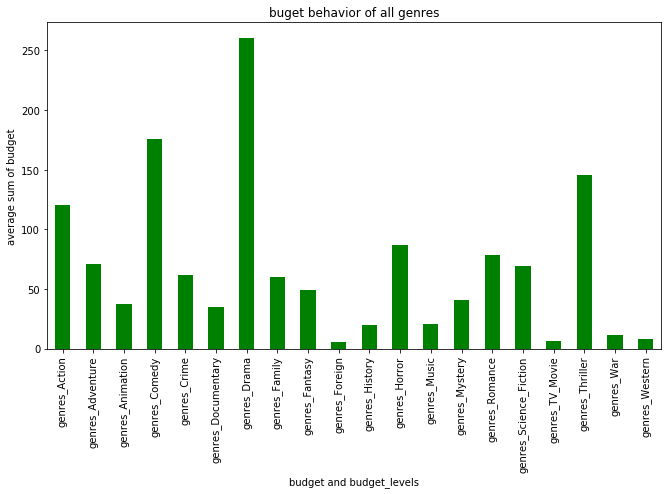

In [82]:
bar_plot = mean_overall_budget.plot(kind ='bar', subplots=True, figsize=(11,6), color='g')
for ax in bar_plot:
    ax.set_ylabel('average sum of budget')
    ax.set_xlabel('budget and budget_levels')
    ax.set_title('buget behavior of all genres')

Stage1C
Part 2. Here I'll be plotting the overall mean and the three categories observed

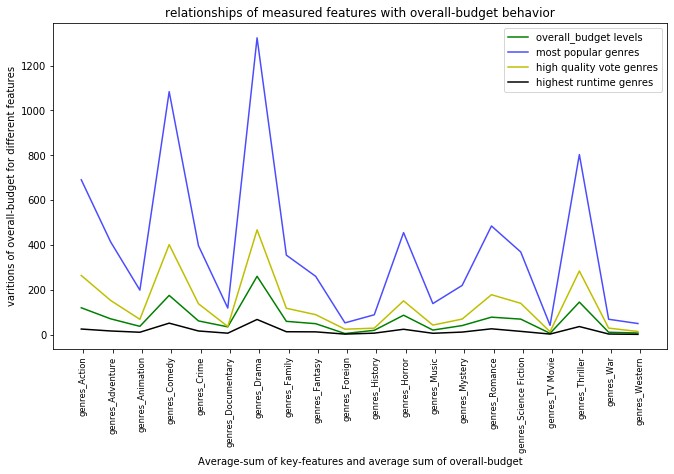

In [83]:
#Stage1C:Part 2
fig7, ax7 = plt.subplots(figsize =(11,6))

ax7.plot(mean_overall_budget, label='overall_budget levels', color='g')
ax7.plot(mean_most_popular_group, label='most popular genres', color='b', alpha=.7)
ax7.plot(mean_high_quality_vote_genres, label='high quality vote genres', color='y')
ax7.plot(mean_highest_runtime_genres, label='highest runtime genres ', color='k')
ticks =ax7.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
labels = ax7.set_xticklabels(['genres_Action', 'genres_Adventure', 'genres_Animation', 'genres_Comedy',
'genres_Crime', 'genres_Documentary', 'genres_Drama', 'genres_Family', 
'genres_Fantasy', 'genres_Foreign', 'genres_History', 'genres_Horror', 
'genres_Music', 'genres_Mystery', 'genres_Romance', 'genres_Science Fiction', 
'genres_TV Movie', 'genres_Thriller', 'genres_War', 'genres_Western'], rotation =90, fontsize = 'small')
  # xtick labels
plt.ylabel('varitions of overall-budget for different features')
plt.xlabel('Average-sum of key-features and average sum of overall-budget')
plt.title('relationships of measured features with overall-budget behavior')
locations = ind + width / 2 
 # xtick locations
plt.xticks(locations, labels)

# legend
plt.legend()


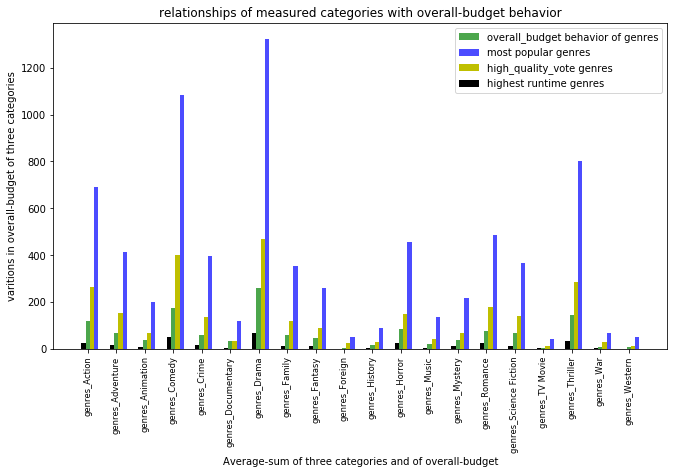

In [84]:
# Stage1C:Part2
fig8, ax = plt.subplots(figsize =(11,6))
ax.bar(ind +width, mean_overall_budget, width, color='g', alpha=.7,label='overall_budget behavior of genres')
ax.bar(ind +3*width, mean_most_popular_group, width, color='b', alpha=.7,label='most popular genres')
ax.bar(ind +2*width, mean_high_quality_vote_genres, width, color='y', alpha=1,label='high_quality_vote genres')
ax.bar(ind, mean_highest_runtime_genres, width, color='k', label='highest runtime genres')
ticks =ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
labels = ax.set_xticklabels(['genres_Action', 'genres_Adventure', 'genres_Animation', 'genres_Comedy',
'genres_Crime', 'genres_Documentary', 'genres_Drama', 'genres_Family', 
'genres_Fantasy', 'genres_Foreign', 'genres_History', 'genres_Horror', 
'genres_Music', 'genres_Mystery', 'genres_Romance', 'genres_Science Fiction', 
'genres_TV Movie', 'genres_Thriller', 'genres_War', 'genres_Western'], rotation =90, fontsize = 'small')
  # xtick labels
plt.ylabel('varitions in overall-budget of three categories')
plt.xlabel('Average-sum of three categories and of overall-budget')
plt.title('relationships of measured categories with overall-budget behavior')
locations = ind + width
 # xtick locations
plt.xticks(locations, labels)

# legend
plt.legend()



<p>The charts in this stage1C show that Popularity is a more significant category than vote_count and runtime. Similarly, vote_count is a better choice for ranking the genres than runtime. if the results in these charts are influenced by the budget then budget allocation should be concentrated on optimizing popularity and vote_count.</p>

<b>Question4: What is the relationship between overall average sum of budget and overall average sum of revenue for each of these three categories</b><br>
Stage 2:

<p>It would be appropriate to take a look at the relationship between overall budget and overall revenue</p>
<ul>
    <li>What is the relationship between overall average sum of budget and overall average sum of revenue for each of three categories:</li>
    <ul>
        <li>Most_popular_level?</li>
        <li>high_quality_vote?</li>
        <li>highest_runtime?</li>
    </ul>
</ul>    

In [85]:
# First I'll will get the mean sum of revenue
revenue_of_genres = df.iloc[:, np.r_[4:5, 20:21, 22:43]]
revenue_of_genres

,revenue,revenue_adj,genres_Action,genres_Adventure,genres_Animation,genres_Comedy,genres_Crime,genres_Documentary,genres_Drama,genres_Family,...,genres_Horror,genres_Music,genres_Mystery,genres_Romance,genres_Science_Fiction,genres_TV_Movie,genres_Thriller,genres_War,genres_Western,budget_level
0,1513528810,1.392446e+09,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,high_budget
1,378436354,3.481613e+08,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,high_budget
2,295238201,2.716190e+08,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,high_budget
3,2068178225,1.902723e+09,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,high_budget
4,1506249360,1.385749e+09,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,high_budget
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10862,0,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10863,0,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10864,0,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
mean_overll_revenue_of_genres = revenue_of_genres.groupby(['revenue', 'revenue_adj']).mean().sum().dropna()
mean_overll_revenue_of_genres.head()

genres_Action       1089.215752
genres_Adventure     660.134991
genres_Animation     304.565743
genres_Comedy       1713.346404
genres_Crime         587.128150
dtype: float64

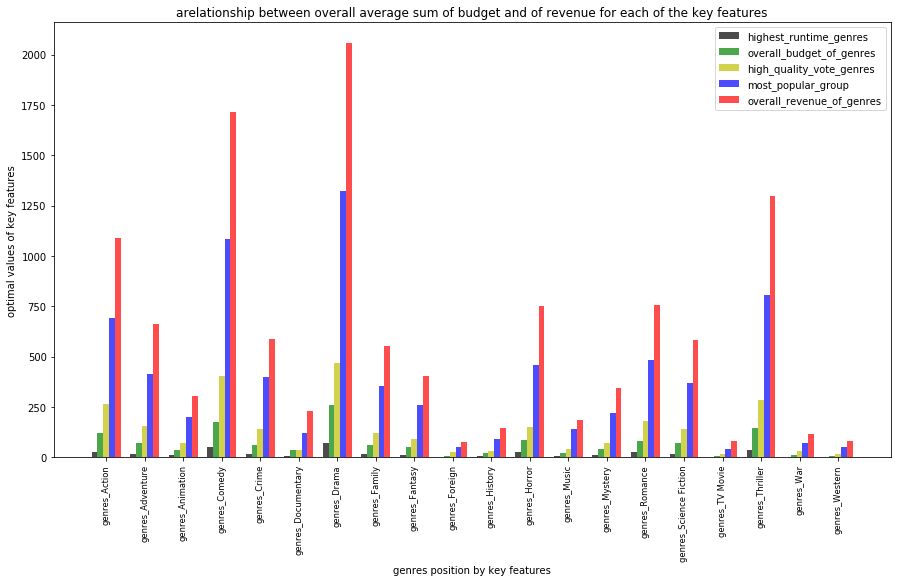

In [87]:
fig9, ax9 = plt.subplots(figsize =(15,8))
ax9.bar(ind, mean_highest_runtime_genres, width, color='k', alpha=.7, label='highest_runtime_genres')
ax9.bar(ind +width, mean_overall_budget, width, color='g', alpha=.7, label='overall_budget_of_genres')
ax9.bar(ind +2*width, mean_high_quality_vote_genres, width, color='y', alpha=.7, label='high_quality_vote_genres')
ax9.bar(ind +3*width, mean_most_popular_group, width, color='b', alpha=.7, label='most_popular_group')
ax9.bar(ind +4*width, mean_overll_revenue_of_genres, width, color='r', alpha=.7, label='overall_revenue_of_genres')

ticks =ax9.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
labels = ax9.set_xticklabels(['genres_Action', 'genres_Adventure', 'genres_Animation', 'genres_Comedy',
'genres_Crime', 'genres_Documentary', 'genres_Drama', 'genres_Family', 
'genres_Fantasy', 'genres_Foreign', 'genres_History', 'genres_Horror', 
'genres_Music', 'genres_Mystery', 'genres_Romance', 'genres_Science Fiction', 
'genres_TV Movie', 'genres_Thriller', 'genres_War', 'genres_Western'], rotation =90, fontsize = 'small')
  # xtick labels
plt.ylabel('optimal values of key features')
plt.xlabel('genres position by key features')
plt.title('arelationship between overall average sum of budget and of revenue for each of the key features')
locations = ind + 2*width
 # xtick locations
plt.xticks(locations, labels)

# legend
plt.legend()
plt.show();

<p>The result above shows that revenue and popularity are the topmost driver (or the two most powerful Market forces) of all genres in the Movie Genres. The four genres earlier identified still maintaining the status quo</p>

<section>
    <b>Question5: Which four genres meet the following specifications year after year:</b><br>
    <h3>Stage3</h3>
    <p>In previous analyses I looked at the relationships between three categories against budget and revenue in generality; in this final analysis I would at this point narrow down a time series analysis of the same features as above but with the specific emphasis on finding genres that could be recommended for my client.
The genres of choice should again meet the following specifications year after year:</p>
    <ul>
        <li>Fall within Most_popular_level year after year</li>
        <li>Fall within high_quality_vote year after year</li>
        <li>Fall within highest_runtime year after year</li>
    </ul>
    <p>I should be able by the end of this section of the analysis find genres in the optimum position of highest runtime, highest popularity, highest vote_count, highest revenue and low budget year after year</p>
</section>

In [88]:
# I'll be making release year my index for the purposes of a time analysis
df_release_year = df.set_index('release_year')
df_release_year

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres_Romance,genres_Science_Fiction,genres_TV_Movie,genres_Thriller,genres_War,genres_Western,budget_level,popularity_level,vote_count_level,runtime_level
release_year,,,,,,,,,,,,,,,,,,,,,
2015-01-01,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,0.0,0.0,0.0,0.0,0.0,0.0,high_budget,most_popular,high_quality_vote,highest_runtime
2015-01-01,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,0.0,0.0,0.0,1.0,0.0,0.0,high_budget,most_popular,high_quality_vote,highest_runtime
2015-01-01,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,0.0,1.0,0.0,0.0,0.0,0.0,high_budget,most_popular,high_quality_vote,highest_runtime
2015-01-01,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,0.0,0.0,0.0,0.0,0.0,0.0,high_budget,most_popular,high_quality_vote,highest_runtime
2015-01-01,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,1.0,0.0,0.0,0.0,0.0,0.0,high_budget,most_popular,high_quality_vote,highest_runtime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966-01-01,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,popular,low_quality_vote,moderate_runtime
1966-01-01,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,popular,low_quality_vote,highest_runtime
1966-01-01,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,popular,low_quality_vote,moderate_runtime


In [90]:
cols_plot = ['revenue','budget', 'runtime', 'popularity', 'vote_count','budget_level', 'runtime_level', 'popularity_level', 'vote_count_level','genres_Action','genres_Adventure','genres_Animation', 'genres_Comedy',
'genres_Crime', 'genres_Documentary', 'genres_Drama', 'genres_Family', 
'genres_Fantasy', 'genres_Foreign', 'genres_History', 'genres_Horror', 
'genres_Music', 'genres_Mystery', 'genres_Romance', 'genres_Science_Fiction', 
'genres_TV_Movie', 'genres_Thriller', 'genres_War', 'genres_Western']
df_group1 = df_release_year[cols_plot].dropna()
df_group1

,revenue,budget,runtime,popularity,vote_count,budget_level,runtime_level,popularity_level,vote_count_level,genres_Action,...,genres_History,genres_Horror,genres_Music,genres_Mystery,genres_Romance,genres_Science_Fiction,genres_TV_Movie,genres_Thriller,genres_War,genres_Western
release_year,,,,,,,,,,,,,,,,,,,,,
2015-01-01,1513528810,150000000,124,32.985763,5562,high_budget,highest_runtime,most_popular,high_quality_vote,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-01,378436354,150000000,120,28.419936,6185,high_budget,highest_runtime,most_popular,high_quality_vote,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2015-01-01,295238201,110000000,119,13.112507,2480,high_budget,highest_runtime,most_popular,high_quality_vote,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2015-01-01,2068178225,200000000,136,11.173104,5292,high_budget,highest_runtime,most_popular,high_quality_vote,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-01,1506249360,190000000,137,9.335014,2947,high_budget,highest_runtime,most_popular,high_quality_vote,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966-01-01,13000000,3000000,128,0.402730,46,low_budget,highest_runtime,popular,low_quality_vote,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1966-01-01,6000000,4653000,120,0.395668,36,low_budget,highest_runtime,popular,low_quality_vote,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1966-01-01,0,4800000,105,0.358161,14,low_budget,highest_runtime,popular,low_quality_vote,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [93]:
# selecting genres within highest runtime
selecting_group_within_higest_runtime = df_group1[df_group1['runtime_level'] =='highest_runtime'].reset_index()
selecting_group_within_higest_runtime

,release_year,revenue,budget,runtime,popularity,vote_count,budget_level,runtime_level,popularity_level,vote_count_level,...,genres_History,genres_Horror,genres_Music,genres_Mystery,genres_Romance,genres_Science_Fiction,genres_TV_Movie,genres_Thriller,genres_War,genres_Western
0,2015-01-01,1513528810,150000000,124,32.985763,5562,high_budget,highest_runtime,most_popular,high_quality_vote,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015-01-01,378436354,150000000,120,28.419936,6185,high_budget,highest_runtime,most_popular,high_quality_vote,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2015-01-01,295238201,110000000,119,13.112507,2480,high_budget,highest_runtime,most_popular,high_quality_vote,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2015-01-01,2068178225,200000000,136,11.173104,5292,high_budget,highest_runtime,most_popular,high_quality_vote,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-01-01,1506249360,190000000,137,9.335014,2947,high_budget,highest_runtime,most_popular,high_quality_vote,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2592,1966-01-01,0,1377800,105,0.410366,99,low_budget,highest_runtime,popular,low_quality_vote,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2593,1966-01-01,13000000,3000000,128,0.402730,46,low_budget,highest_runtime,popular,low_quality_vote,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2594,1966-01-01,6000000,4653000,120,0.395668,36,low_budget,highest_runtime,popular,low_quality_vote,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2595,1966-01-01,0,4800000,105,0.358161,14,low_budget,highest_runtime,popular,low_quality_vote,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


<p>From the table above, it is obvious that there are genres within the highest runtime which also run on low budget; however, what is not certain from that table is if one could still find those genres within the most popular group</p>

Text(0, 0.5, 'runtime year after year')

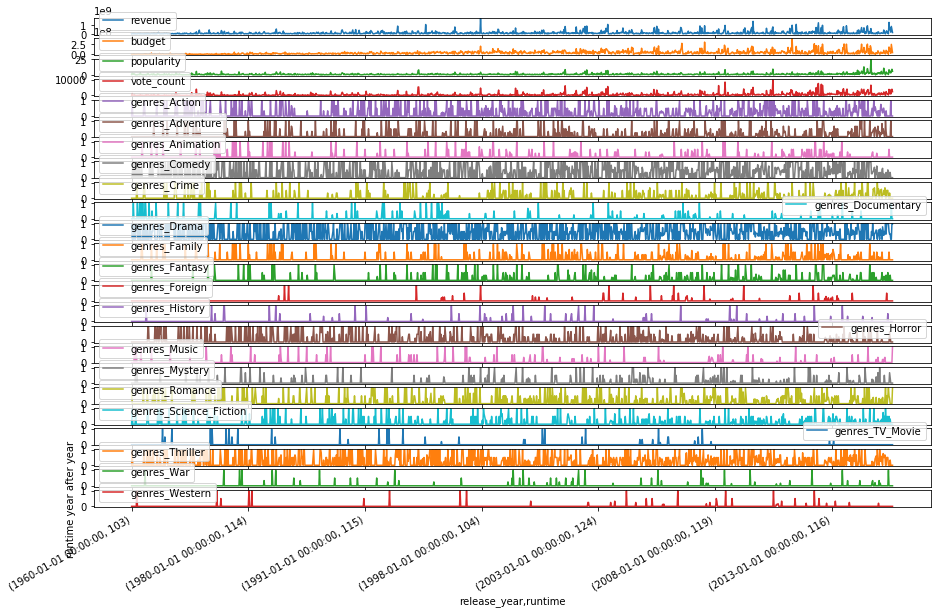

In [94]:
# A time series for the highest runtime
time_series_for_highest_runtime_group = selecting_group_within_higest_runtime.groupby(['release_year', 'runtime'])
time_series_for_highest_runtime_group.mean().plot(subplots=True, figsize=(15,10));
plt.ylabel('runtime year after year')

Text(0, 0.5, 'runtime for the year 1966')

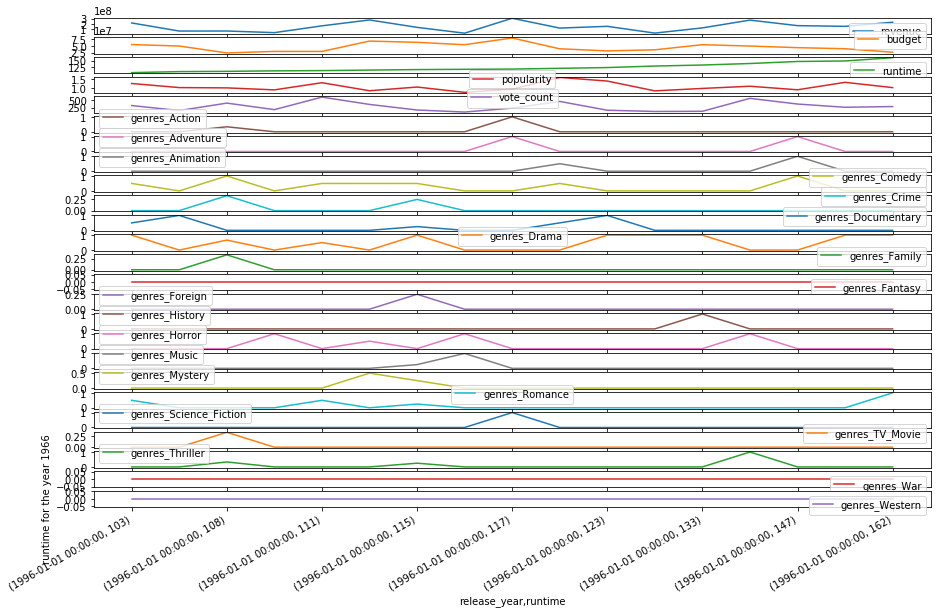

In [95]:
# Zooming in for more detail-A look at runtime within a year
runtime_btw_1960_1985years = selecting_group_within_higest_runtime.loc['1960':'1985'].groupby([selecting_group_within_higest_runtime['release_year'], selecting_group_within_higest_runtime['runtime']])
runtime_btw_1960_1985years.mean().plot(subplots=True, figsize=(15,10));
plt.ylabel('runtime for the year 1966')

In [96]:
# Here am selecting most popular from the already existing highest runtime group
# At the execution of this part we should have both highest runtime and most popular genres in one group
selecting_most_popular_group = selecting_group_within_higest_runtime[selecting_group_within_higest_runtime['popularity_level'] =='most_popular']
selecting_most_popular_group

,release_year,revenue,budget,runtime,popularity,vote_count,budget_level,runtime_level,popularity_level,vote_count_level,...,genres_History,genres_Horror,genres_Music,genres_Mystery,genres_Romance,genres_Science_Fiction,genres_TV_Movie,genres_Thriller,genres_War,genres_Western
0,2015-01-01,1513528810,150000000,124,32.985763,5562,high_budget,highest_runtime,most_popular,high_quality_vote,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015-01-01,378436354,150000000,120,28.419936,6185,high_budget,highest_runtime,most_popular,high_quality_vote,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2015-01-01,295238201,110000000,119,13.112507,2480,high_budget,highest_runtime,most_popular,high_quality_vote,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2015-01-01,2068178225,200000000,136,11.173104,5292,high_budget,highest_runtime,most_popular,high_quality_vote,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-01-01,1506249360,190000000,137,9.335014,2947,high_budget,highest_runtime,most_popular,high_quality_vote,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2571,1978-01-01,55000000,650000,127,1.210531,306,low_budget,highest_runtime,most_popular,high_quality_vote,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2572,1978-01-01,300218018,55000000,143,1.210324,518,high_budget,highest_runtime,most_popular,high_quality_vote,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2573,1978-01-01,141000000,2700000,109,1.157930,230,low_budget,highest_runtime,most_popular,high_quality_vote,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2574,1978-01-01,50000000,15000000,183,0.959754,464,moderate_budget,highest_runtime,most_popular,high_quality_vote,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Now we have from the table above genres within the highest rutime and the most popular group

Text(0, 0.5, 'popularity year after year')

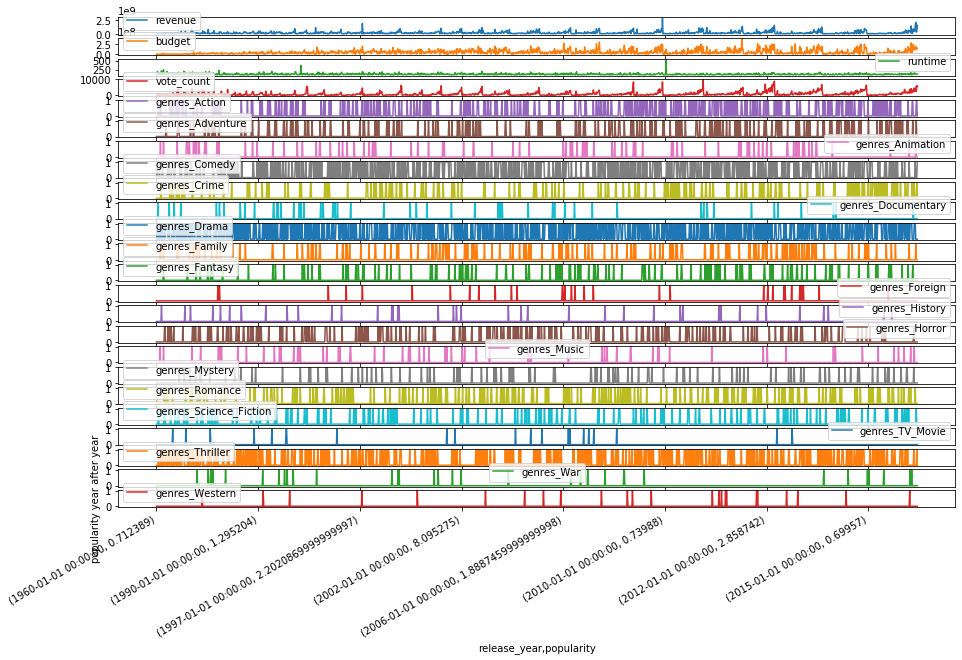

In [97]:
# This is now the time series for both the most popular genres and the highest runtime genres
time_series_highest_runtime_most_pop_group =selecting_most_popular_group.groupby(['release_year', 'popularity'])
time_series_highest_runtime_most_pop_group.mean().plot(subplots=True, figsize=(15,10));
plt.ylabel('popularity year after year')

In [98]:
#Next I'll be selecting high_quality_vote genres from the two groups already gotten-namely: most_popular genres and highest vote_count genres.
# At the execution of this code we now have all three grops in one place_namely: most popular genres, highest runtime genres, and high quality vote genres in one place
selecting_high_quality_vote_group = selecting_most_popular_group[selecting_most_popular_group['vote_count_level']=='high_quality_vote']
selecting_high_quality_vote_group

,release_year,revenue,budget,runtime,popularity,vote_count,budget_level,runtime_level,popularity_level,vote_count_level,...,genres_History,genres_Horror,genres_Music,genres_Mystery,genres_Romance,genres_Science_Fiction,genres_TV_Movie,genres_Thriller,genres_War,genres_Western
0,2015-01-01,1513528810,150000000,124,32.985763,5562,high_budget,highest_runtime,most_popular,high_quality_vote,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015-01-01,378436354,150000000,120,28.419936,6185,high_budget,highest_runtime,most_popular,high_quality_vote,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2015-01-01,295238201,110000000,119,13.112507,2480,high_budget,highest_runtime,most_popular,high_quality_vote,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2015-01-01,2068178225,200000000,136,11.173104,5292,high_budget,highest_runtime,most_popular,high_quality_vote,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-01-01,1506249360,190000000,137,9.335014,2947,high_budget,highest_runtime,most_popular,high_quality_vote,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569,1978-01-01,181813770,6000000,110,1.697618,786,low_budget,highest_runtime,most_popular,high_quality_vote,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2571,1978-01-01,55000000,650000,127,1.210531,306,low_budget,highest_runtime,most_popular,high_quality_vote,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2572,1978-01-01,300218018,55000000,143,1.210324,518,high_budget,highest_runtime,most_popular,high_quality_vote,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2573,1978-01-01,141000000,2700000,109,1.157930,230,low_budget,highest_runtime,most_popular,high_quality_vote,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Text(0, 0.5, 'vote_count year after year')

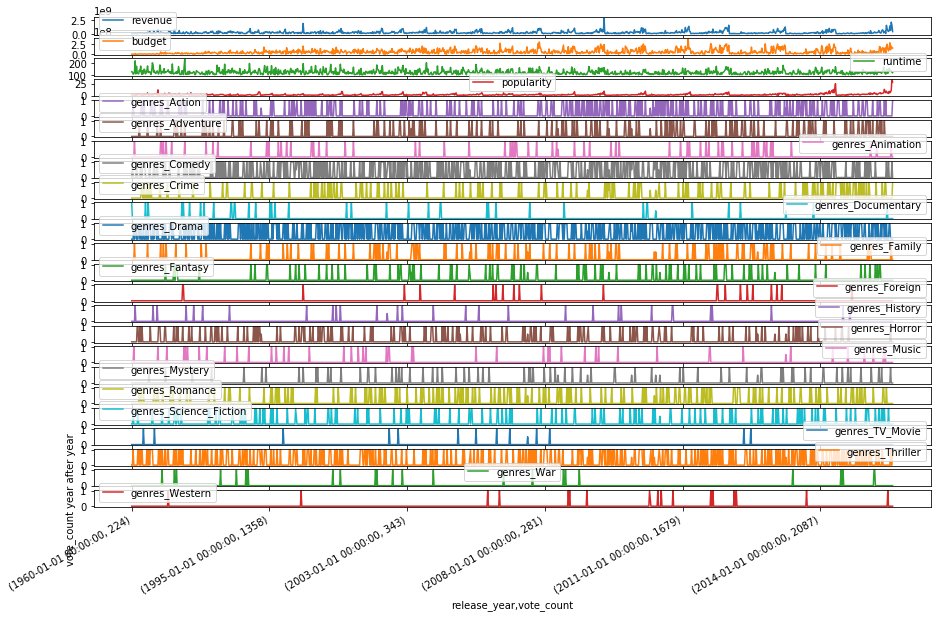

In [100]:
# A display of all three categories in one group/table
time_series_highest_runtime_most_pop_high_quality_vote_group =selecting_high_quality_vote_group.groupby(['release_year', 'vote_count'])
time_series_highest_runtime_most_pop_high_quality_vote_group.mean().plot(subplots=True, figsize=(15,10));
plt.ylabel('vote_count year after year')

Finally, selecting genres that run on low budget in order to satisfy my client's conditions

In [101]:
# At this level we have successfully selected all our desired features in this data frame; that is, highest_runtime, most_popular, high_quality_vote and low_budget.
selecting_low_budget_group =selecting_high_quality_vote_group[selecting_high_quality_vote_group['budget_level'] =='low_budget']
selecting_low_budget_group.head()

,release_year,revenue,budget,runtime,popularity,vote_count,budget_level,runtime_level,popularity_level,vote_count_level,...,genres_History,genres_Horror,genres_Music,genres_Mystery,genres_Romance,genres_Science_Fiction,genres_TV_Movie,genres_Thriller,genres_War,genres_Western
32,2015-01-01,35401758,6000000,117,3.557846,1520,low_budget,highest_runtime,most_popular,high_quality_vote,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
34,2015-01-01,62076141,11000000,111,3.227329,754,low_budget,highest_runtime,most_popular,high_quality_vote,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
40,2015-01-01,85512300,12000000,109,2.968254,1252,low_budget,highest_runtime,most_popular,high_quality_vote,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
41,2015-01-01,9064511,4000000,118,2.885126,638,low_budget,highest_runtime,most_popular,high_quality_vote,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,2015-01-01,40272135,11800000,118,2.883233,562,low_budget,highest_runtime,most_popular,high_quality_vote,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0, 0.5, 'budget year after year')

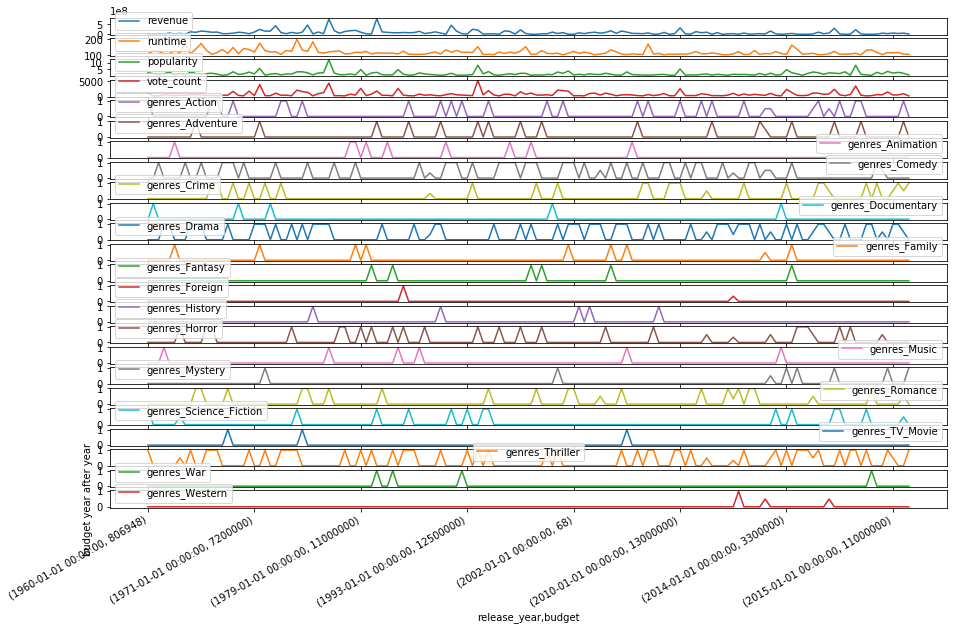

In [102]:
# A final plot to see the four genres of choice
time_series_highest_runtime_most_pop_high_quality_vote_low_budget_group = selecting_low_budget_group.groupby(['release_year', 'budget'])
time_series_highest_runtime_most_pop_high_quality_vote_low_budget_group.mean().plot(subplots=True, figsize=(15,10));
plt.ylabel('budget year after year')

<ul>
    <li>For this final analysis of all four desired features year after year, it can be seen that genres_Drama is significantly prominent.</li>
    <li>genres_Comedy came second position in the early part of the analyses but has been displaced by the genres_Thriller. This means that for a year to year low budget requirement while maintaining a strong position in popularity, vote_count and runtime, the genres_Thriller is of more economic advantage than the genres_Comedy.</li>
    <li>The genres_Action is the forth in the group for a low budget requirement</li>

<section id="Conclusion">
<h3>Conclusion</h3>
</section>

<body>
    <section>
        <h3>N/B: All results were measured from exploratory data analyses and as a result are tentative Conclusions:</h3>
        <br>
        <ul>
            <li><b>In Stage1A four leading genres in these key categories were sought:</b></li>
            <ul>
                <li>Most_popular_level</li>
                <li>high_quality_vote</li>
                <li>highest_runtime</li>
            </ul>
            <br>
            <li><b>From the various plots in stage1A four of the genres that were topmost within the above three categories are listed below according to degree of magnitude:</b></li>
            <ol>
                <li>Genres_Drama</li>
                <li>Genres_Comedy</li>
                <li>Genres_Thriller</li>
                <li>Genres_Action</li>
            </ol>
            <br>
            <li>
                <p><b>Stage1B: measures the individual relationship between each of the above three categories and the budget behavior corresponding to each category for each of the four genres.</b></p>
                <ul>
                    <p><li>In this stage it was found that the budget requirement of Genres_Comedy and Genres_Drama show a relatively steady relationship within the various levels of budget observed. The budget requirement for the other two genres (genres_Action and genres_Thriller) showed variations in at least one of the levels of budget observed.</li></p>
                <p><li>It was also found in this stage1B that Genres_Drama and Genres_Comedy are in a healthy competition with respect to vote_count budgetary requirement for the different budget levels observed. While Genres_Action and Genres_Thriller also show evidence of competition with respect to vote_count budgetary requirement.</li></p>
                <p><li>For this stage also, it was observed that the relationship between the highest_runtime Genres budgetary requirement for the different budget levels observed show consistency with earlier results in this stage.</li></p>
                </ul>
            </li>
            <li>
                    <p><b>Stage1C: This section took into account the COMBINED relationship of those categories under investigation with the general budget.</b></p>
                    <ul>
                        <li>The results from this stage1C show that Popularity is a more significant category than vote_count and runtime.</li>
                        <li>Similarly, vote_count is a better choice for ranking the genres than runtime.</li>
                        <li>It further shows that if the results in the charts from this stage are influenced by the budget then budget allocation should be concentrated on optimizing popularity and vote_count.</li>
                    </ul>
            </li><br>
            <ul>
            <li><p><b>Stage 2: This stage analyzed the relationship between overall budget and overall revenue for each of three categories:</b></p></li>
            <ul>
                <li>Most_popular_level</li>
                <li>high_quality_vote</li>
                <li>highest_runtime</li>
                <li>The result in stage2 shows that revenue and popularity are the topmost driver (or the two most powerful Market forces) of all genres in the Movie Genres.</li>
                </ul>
            </ul><br>
            <p><b>Stage3: In this final analysis, a time series analysis of the same features in stage2 with the specific emphasis on finding genres that meet the following specifications year after year was carried out:</b></p>
            <ul>
                <li>Fall within Most_popular_level year after year</li>
                <li>Fall within high_quality_vote year after year</li>
                <li>Fall within highest_runtime year after year</li>
            </ul>
            <ul>
            <p><li>The result from this showed that it was possible to find genres within the three categories of interest that also run on low budget.</li></p>
            <p><li>The result showed that of all four desired features year after year, genres_Drama is significantly prominent.
 Though the genres_Comedy had second place in the early part of the analyses but was displaced by the genres_Thriller.</li></p>
            <p><li>The result shows that for a year to year low budget requirement while maintaining a strong position in popularity, vote_count and runtime, the genres_Thriller is of more economic advantage than the genres_Comedy. The genres_Action is the forth in the group of four for a low budget requirement.</li></p>
            </ul>
        </ul>
    </section>
</body>

<section id="Resources">
<h3>Resources</h3>
</section>

<ul>
    <li>Udacity Knowledge base</li>
    <li>Stack overflow</li>
    <li>Python for Data analysis (Text Book)</li>
    <li>Dataquest blog post on Time Series Analysis</li>
</ul>